# Probas

Este caderno ten como proposito probar _parametros_ vendo as imaxes. Todos os módulos pódense executar independientemente.
- **Canles entrada.** O obxectivo e aportar información _util_
- **Aumento de datos.** O obxectivo e simular variación que poden ocurrir no conxunto de proba.
- **Post-procesado.** O obxectivo e mellorar a saída da rede.

---
#### Canales entrada

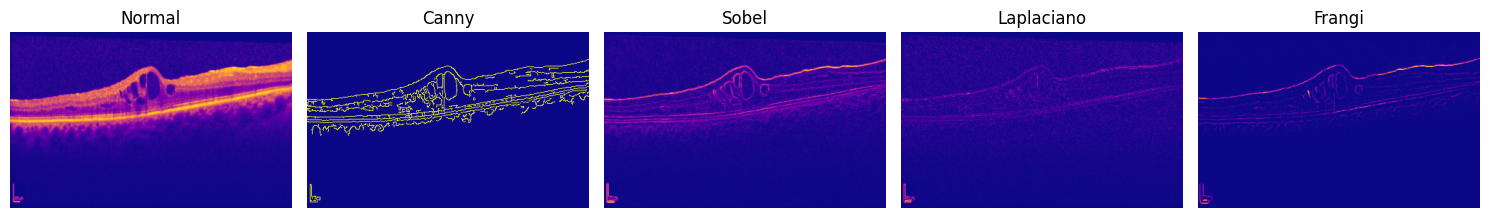

In [1]:
from ConxuntoDatos import ConxuntoDatosOCT
from graficas import grafica_canles

conxuntoDatos = ConxuntoDatosOCT(ruta='../OCT-dataset', 
                                aumento_datos=False, 
                                particion='adestramento',
                                razon=0.9,
                                novo_tamano=(250, 400), 
                                anade_canny=True, 
                                anade_sobel=True, 
                                anade_laplacian=True,
                                anade_frangi=True,)

tensor_im, mascara = conxuntoDatos[10]
titulos=['Normal', 'Canny', 'Sobel', 'Laplaciano', 'Frangi']
grafica_canles(tensor_im, titulos)

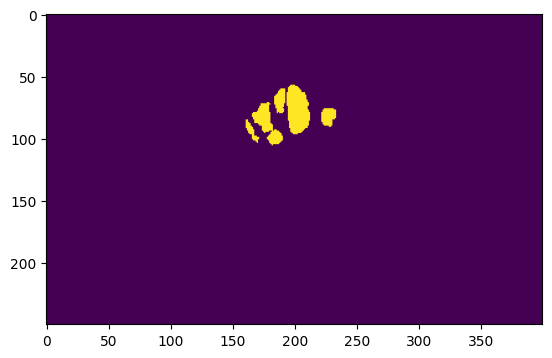

In [3]:
import matplotlib.pyplot as plt

mascara = mascara[0,:,:]
plt.imshow(mascara);

---

#### Aumento de datos

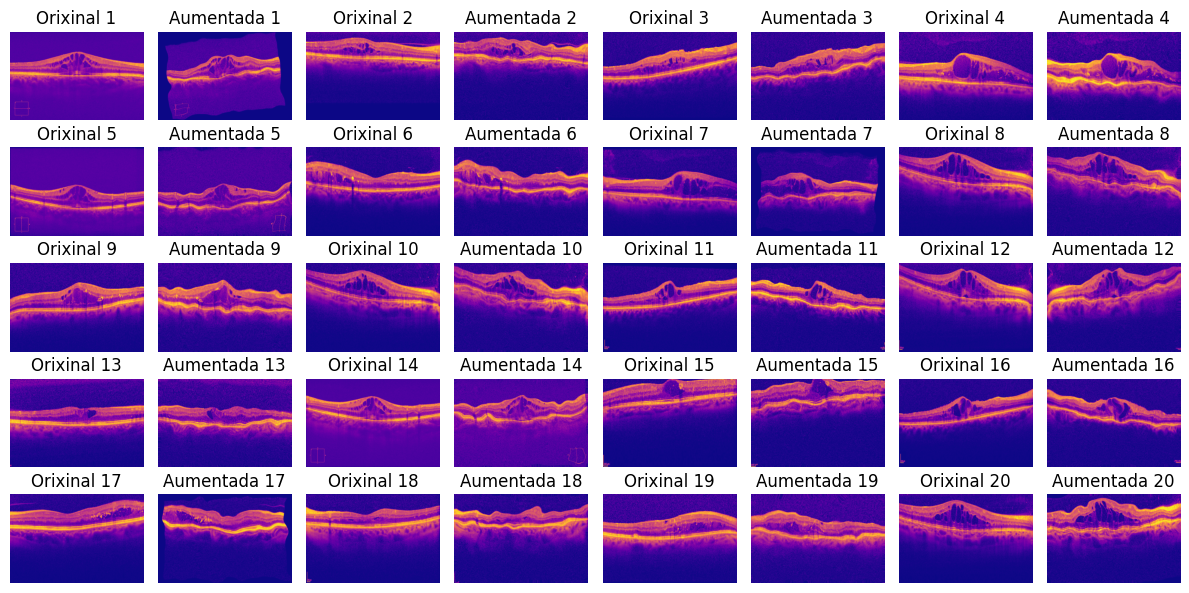

In [1]:
from graficas import grafica_aumento_datos
from ConxuntoDatosC import ConxuntoDatosOCT

grafica_aumento_datos(ConxuntoDatosOCT, 5, 4, '../OCT-dataset')

---
#### Post-procesado

In [2]:
from Rede import UNet
from transformacions import PostProcesado
from graficas import grafica_prediccions, grafica_canles
from ConxuntoDatos import ConxuntoDatosOCT
import matplotlib.pyplot as plt
import torch
import numpy as np

conxuntoDatos = ConxuntoDatosOCT(ruta='../OCT-dataset', 
                                aumento_datos=False, 
                                particion='adestramento',
                                razon=0.9,
                                novo_tamano=(192, 544), 
                                anade_canny=True, 
                                anade_sobel=False, 
                                anade_laplacian=False,
                                anade_frangi=False)

unet = UNet(
        canles_entrada=2, 
        canles_base=32, 
        profundidade=5, 
        probabilidade_dropout=0.001)

unet.load_state_dict(torch.load('../parametros/adTrue_batch2_proc7_canles32_prof5_lr0.001_factor0.6_dropout0.005_pac60_paclr15_tam450x600_ep201_perdVal0.1798813392718633.pth', weights_only=True))
postprocesado = PostProcesado()



In [78]:
indice = np.random.randint(len(conxuntoDatos))

In [79]:
tensor_im, mascara = conxuntoDatos[indice]

mascara = mascara[0,:,:]

imagen = tensor_im.unsqueeze(0)
mascara_predicha = unet(imagen)
mascara_predicha = torch.sigmoid(mascara_predicha).squeeze().detach().cpu().numpy()
mascara_predicha[mascara_predicha < 0.5] = 0
mascara_predicha[mascara_predicha > 0.5] = 1

mascara_postprocesada = postprocesado(mascara_predicha)

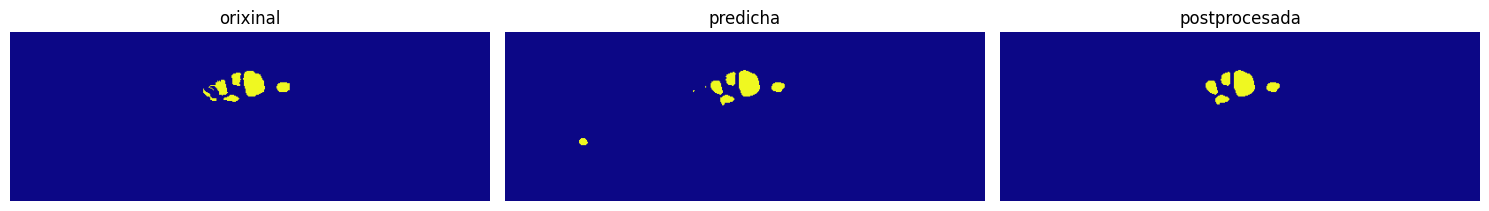

In [80]:
titulos=['orixinal', 'predicha', 'postprocesada']
mascaras = torch.stack([mascara, torch.from_numpy(mascara_predicha), torch.from_numpy(mascara_postprocesada)])
grafica_canles(mascaras, titulos)